# Part I - (Go Bike Trip Data visualization)
## by (Kiwtana Shebabetsi Ezechiel)

## Introduction
This project is mainly about the data visualisation, the part I is just about the explaration of the data using all kinds of visualizations related to it. There is also a little data wrangling here just to make the data we want to work with a little bit more smoother for the visualisations. The dataset we are going to investigae contains informations about the bike-sharing system for the San-Francisco Bay area

## Preliminary Wrangling


In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [19]:
gobike_df = pd.read_csv('ford_gobike_tripdata.csv')

In [20]:
# highlight the dataframe shape and the first 5 rows form the data
print(gobike_df.shape)
gobike_df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# See the inofrmation about each column in the dataset
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check for null values in columns
gobike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# Ckeck for duplicated values in the datasets
gobike_df.duplicated().sum()

0

In [9]:
# Make a description on numerical columns in the dataset
gobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Found issues
 - There are some missing values in some columns, [start_station_id, start_station_name, end_station_id, end_station name, member_birth_year, member_gender]
 - Innaporproprite data types:
    - start_time and end time should be __datetime__ datatype
    - user_type and member_gender should be __categories__ datatype
    - member_birth_year should be an __int__ datatype
    - start_sation_id, end_station_id, bik_id should be of type __str__
- There are some no necessary column to get rid of

#### Data cleaning

In [21]:
# Make a copy of the data
gobike_clean = gobike_df.copy()

#### Define
Remmove any row with missing values
##### code

In [22]:
# User drop ana to remove null values
gobike_clean.dropna(how = 'any', axis = 0, inplace= True)

In [23]:
# Check if the null values have beeen dropped
gobike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### define
There are some Innapropriate datypes
- start_time and end time should be __datetime__ datatype
- user_type and member_gender should be __categories__ datatype
- member_birth_year should be an __int__ datatype
- start_sation_id, end_station_id, bik_id should be of type __str__

##### Code

In [24]:
# conver the start and end time colum to dattime
gobike_clean['start_time'] = pd.to_datetime(gobike_clean.start_time)
gobike_clean['end_time'] = pd.to_datetime(gobike_clean.end_time)

#convert the user_type and menmber_gender as category datatype
gobike_clean['user_type'] = gobike_clean.user_type.astype('category')
gobike_clean['member_gender'] = gobike_clean.member_gender.astype('category')

# convert the  meber bithr year column to integer
gobike_clean.member_birth_year = gobike_clean.member_birth_year.astype('int64')

# convert the  start, end station_id and bike id to strings
gobike_clean['start_station_id'] = gobike_clean['start_station_id'].astype(str)
gobike_clean['end_station_id'] = gobike_clean['end_station_id'].astype(str)
gobike_clean['bike_id'] = gobike_clean['bike_id'].astype(str)

In [25]:
# check if all the data are consistent now
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### Define
Get rid of unncessary columns
##### code

In [26]:
# Remove lontitude and latitude and bike_share for_all_trip comlumns
gobike_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'],  axis = 1, inplace= True)

In [27]:
# Test the code
print(gobike_clean.shape)
gobike_clean.head()

(174952, 11)


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male


In [28]:
# Save the clean data to csv
gobike_clean.to_csv('cleaned_data.csv', index = False)

### What is the structure of your dataset?

> After doing a simple wrangling, the dataset has now 174952 entries and 12 attributes (duration_sec, strat_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, kibe_id, user_type, member_birth_year, member_gender and uer_tyep)

### What is/are the main feature(s) of interest in your dataset?

> The interested feature in this dataset is the bike ride start to end time (in term of month, year, day of week,  hours). What does do they depend on ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like the user_type,user_type, member_birth_year, station_names will help the support of my investigation

## Univariate Exploration
We kick it off with the feature engineering. We are looking to depeature the start_time into day and hour. And also calculate the ages of each member.
This is all for the purpose of the future usage of course.

In [29]:
# use the strftime() method to make these columns
gobike_clean['start_day'] = gobike_clean['start_time'].apply(lambda x: x.strftime('%A')).astype('category')
gobike_clean['start_hour'] = gobike_clean['start_time'].apply(lambda x: x.strftime('%H')).astype('int64')

# the age of each member
gobike_clean['member_age'] = 2017 - gobike_clean['member_birth_year']

# set a sefault color
base_color = sb.color_palette()[0]

##### The distribution of day and hour of start time

Text(0.5, 0, 'Hours')

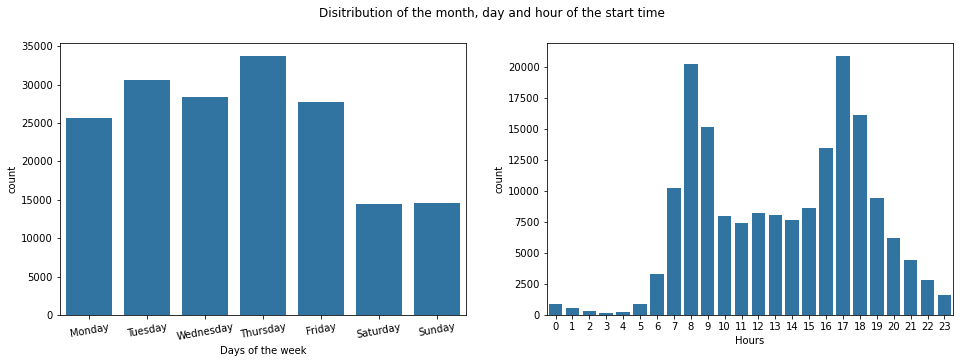

In [30]:
# Lest's order the time first
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_hour = np.arange(0, 24)

# set the size of the Graph
plt.figure(figsize = [16, 5])

plt.suptitle('Disitribution of the month, day and hour of the start time')


# Left plot
plt.subplot(1, 2, 1)
sb.countplot(data = gobike_clean, x = 'start_day', color = base_color, order = order_day);
plt.xlabel('Days of the week')
plt.xticks(rotation = 10)

# Rigth plot
plt.subplot(1, 2, 2)
sb.countplot(data = gobike_clean, x = 'start_hour', color = base_color, order = order_hour);
plt.xlabel('Hours')

- Weekdays have higher number of rides than weekends, they raise between 26K and 33k rides in the weekdays. This thouroughly makes sense because it is in working days.
- Peak hours are in `8 am - 9 am` and `5 pm - 6 pm`. This also makes sense because these are the usual time for people going to and coming from work.

#### Distribution of Rider ages

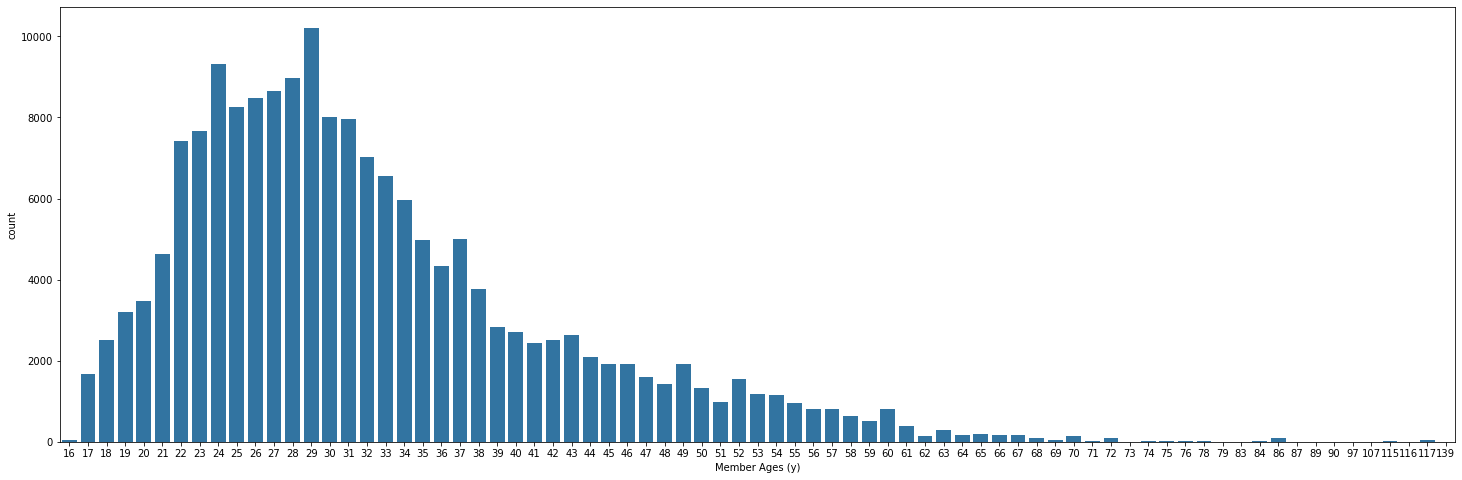

In [32]:
# Lets plot a bar plot
plt.figure(figsize = [25, 8])

# Set the age in descending order
order_age = gobike_clean['member_age'].value_counts().index

sb.countplot(data = gobike_clean, x = 'member_age', color = base_color)
plt.xlabel('Member Ages (y)');

Text(0.5, 0, 'Member ages (y)')

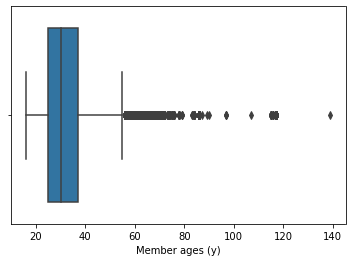

In [70]:
# USe the box plot to understand the summary of the member age
sb.boxplot(data = gobike_clean, x = 'member_age')
plt.xlabel('Member ages (y)')

In [33]:
gobike_clean.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

We can see that the member_birth_year has got many outliers, it is impossible to have someone these days being born in 1878. And also, it hard to find someone riding a bike at the age of 65 above. So, let's take on the member whose age is less than 60. 

In [39]:
gobike_clean = gobike_clean[gobike_clean.member_age <= 60]

In [40]:
gobike_clean.member_age.describe()

count    172746.000000
mean         31.738651
std           9.250810
min          16.000000
25%          25.000000
50%          30.000000
75%          37.000000
max          60.000000
Name: member_age, dtype: float64

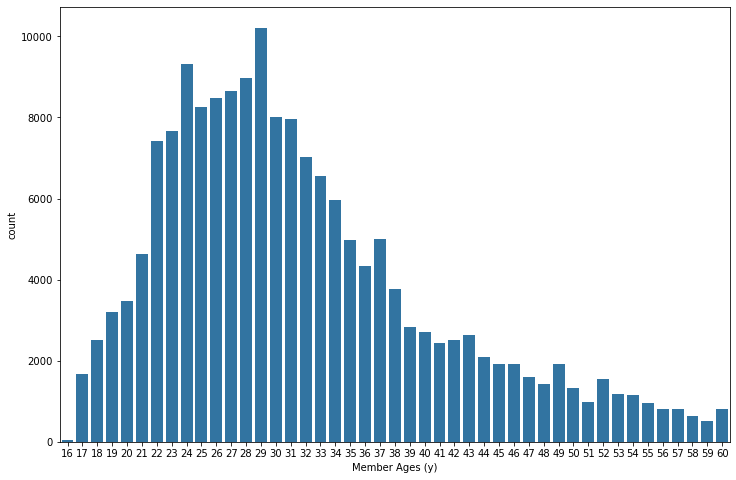

In [43]:
# Bar plot after seting member age to less than 60
# Lets plot a bar plot
plt.figure(figsize = [12, 8])

sb.countplot(data = gobike_clean, x = 'member_age', color = base_color)
plt.xlabel('Member Ages (y)');

Text(0.5, 0, 'Member ages (year)')

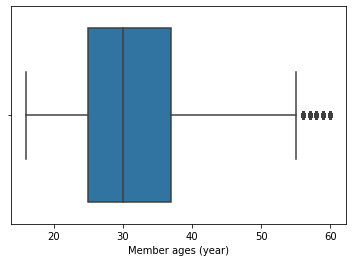

In [41]:
# We plot a barchart based on the new data (member age less than or equal 60)
#plt.figure(figsize = [16, 6])
sb.boxplot(data = gobike_clean, x = 'member_age');
plt.xlabel('Member ages (year)')

Most riders rise between the ages of `25 and 45` which means the age infludes the rent of bike ride frequency. Young people are the one that rides the most often.

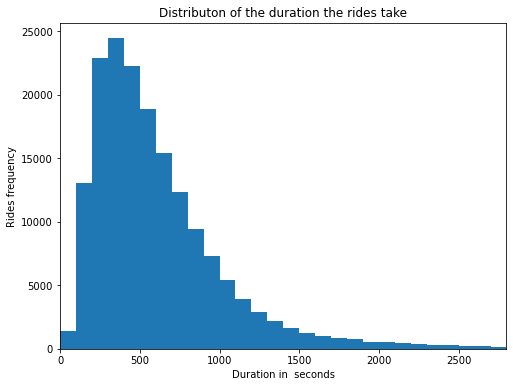

In [45]:
# plot the distribution of duration in seconds 
# Set the fise of the graph
plt.figure(figsize=[8, 6])

# Set the bins
bins_edges = np.arange(0, gobike_clean.duration_sec.max()+100, 100)

# plot the histogram
plt.hist(data = gobike_clean, x = 'duration_sec', bins = bins_edges);

# Set the limitation
plt.xlim(0, 2800);
plt.xlabel('Duration in  seconds')
plt.ylabel('Rides frequency')
plt.title('Distributon of the duration the rides take');

The distribution of duration is __right skewed__ and long tialed. Let's scale it using the long

In [46]:
# let's view the description of log10 of duration
np.log10(gobike_clean.duration_sec.describe())

count    5.237408
mean     2.847583
std      3.217367
min      1.785330
25%      2.509203
50%      2.707570
75%      2.896526
max      4.927103
Name: duration_sec, dtype: float64

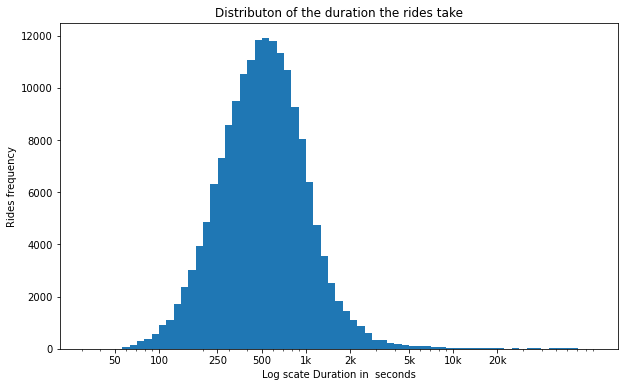

In [47]:
# plot the distribution of duration in seconds 
#  set the size of the graph
plt.figure(figsize=(10, 6))

# Set the bins
bins_edges = 10 ** np.arange(1.5, np.log10(gobike_clean.duration_sec.max())+0.05, 0.05)

plt.hist(data = gobike_clean, x = 'duration_sec', bins = bins_edges)

# Set the log on the x axes
plt.xscale('log')

# xtick setting
plt.xticks([50,100,250,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,250,500, '1k', '2k', '5k', '10k', '20k'])

# Set the labels
plt.xlabel('Log scate Duration in  seconds')
plt.ylabel('Rides frequency')
plt.title('Distributon of the duration the rides take');

After the log scale settings,  the duration distribution is now `normally distributed` and `unimodal`. The highest trip duration trips raise between __300__ and __900__.

Distribution of user type and member gender

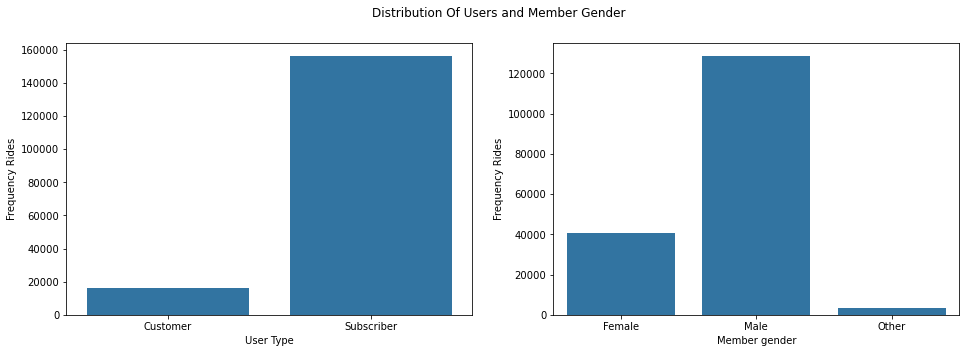

In [48]:
# Lest plot them both at once
# set the fig size
plt.figure(figsize=[16, 5])

# Main plot title
plt.suptitle('Distribution Of Users and Member Gender')

# Left graph
plt.subplot(1, 2, 1)
sb.countplot(data = gobike_clean, x = 'user_type', color = base_color);
plt.xlabel('User Type')
plt.ylabel('Frequency Rides')

# Right graph
plt.subplot(1, 2, 2)
sb.countplot(data = gobike_clean, x = 'member_gender', color = base_color);
plt.xlabel('Member gender')
plt.ylabel('Frequency Rides');

- In the user type distribution, we can see that `Subscriber` type has more rides than 'Customer`. Users who take rides most often are third parties.
- In the member gender distribution, we can see that gender with most number of rides are `male` with over _120k_ rides followed by `Female` with nearly _40k_ rides. The `other` gender has the least number.

#### Common start station

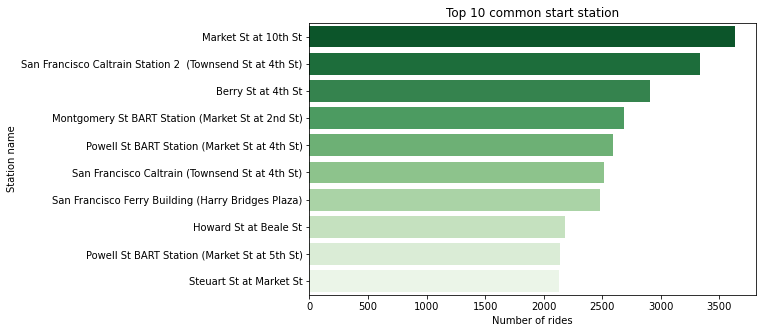

In [49]:
plt.figure(figsize = [8, 5])
# peak start station name
number_start = gobike_clean.start_station_name.value_counts().nlargest(10)

# slice the number_start to 
start_station = gobike_clean.loc[gobike_clean.start_station_name.isin(number_start.index)]

# plot
sb.countplot(data = start_station, y = 'start_station_name',  color = base_color, order = number_start.index, palette = 'Greens_r');
plt.xlabel('Number of rides')
plt.ylabel('Station name')
plt.title('Top 10 common start station');

You can see based on this graph, the 10 station name most common where the rides start with __Market St at 10th St__ at the top of all the others with `over 3500 rides` that start there. The seond is San __Fransisco Caltrain station2 (Townsend St at St)__ that has around 3400 rides as a start station. There is something, that comes to my eyes when i obsever this plot, i can see that there is an other San __Francisco Caltrain__, The only thing is that it is not `Station2`. This need a deep investigation for the future. We can just stop here for now.

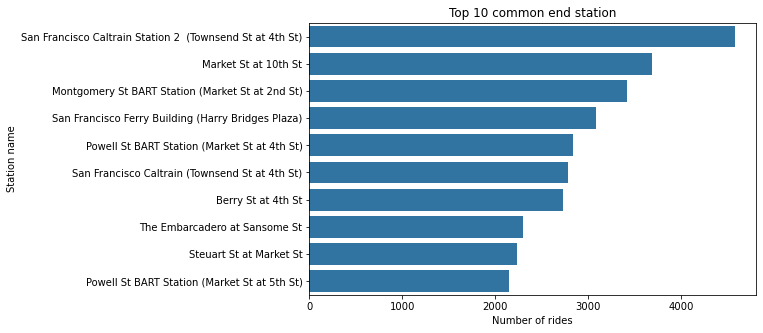

In [50]:
plt.figure(figsize = [8, 5])
# peak end station name
number_end = gobike_clean.end_station_name.value_counts().nlargest(10)

# slice the number_end to 
end_station = gobike_clean.loc[gobike_clean.end_station_name.isin(number_end.index)]

# plot graph
sb.countplot(data = end_station, y = 'end_station_name',  color = base_color, order = number_end.index)
plt.xlabel('Number of rides')
plt.ylabel('Station name')
plt.title('Top 10 common end station');

Based on this graph too, there is over 4500 number of rides that stops at __San Fransisco Caltrain Station 2 (Twonsend St at 4th St)__ Station. Which makes it the dominant end of rides followed by 9 others. __Martek St at 10th St__ is the second one this time. Both of them San Fransisco Caltrain Station 2 and Market St at 10th St Stations have the most number of starting and ending of rides. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I had to turn the start_time into days of week, and hours in order to perform better the distribution of starting days and hours. What i found unusual is that the dataset seems to contain only the start_time of february. So i couldn't transform the start_time into months.
- I found that the riders with the most number of rides are people with the age between `25 t0 45`. And the most common starting and ending hours of rides is between `8 and 9 AM` and `5 and 6 PM`respectively.
- The ride duration had a long tail and right skewed distribution. I made a transformation usinf the log scale method and i ended up having a normal and unimodal distribution.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The tidiness  issues were solved during the cleaning phase. However, during the investigation in the visualization, we found that the member_birth_year has outliers with people borth befor2 1890 so, we changed it and only focused on the people with less than 60 years old.

## Bivariate Exploration

> In this section,I will investigate relationships between pairs of variables in my
data.

#### What is the relationship between the start riding hours and the gender of members ?

In [116]:
# create two variabels for member start time

member_start_hour = gobike_clean.groupby(['start_hour', 'user_type']).size().reset_index()
member_start_day = gobike_clean.groupby(['start_day', 'member_gender']).size().reset_index()

def thePointplot(df, var_x, var_y, var_hue, order = None, palette = None, linestyles = None, dodge = None):
    """The function to plot pointplot graphs with their specific categories

        Args:
             df : the given dataframe
             var_x : what is to be found on the x axis
             var_y : what is to be found on the ya axis
             var_hue: the given hue variabel

        Return: The pointplot
    """
    # Set the graph dimenssion
    plt.figure(figsize= [10, 6])


    # plot
    sb.pointplot(data = df, x = var_x, y = var_y, hue = var_hue)

    # Replace the _ with a space
    var_x = var_x.replace("_", " ")
    if var_y == 0:
        title = f"Frequncy of {var_x} on {var_hue}"
    else:
        var_y = var_y.replace("_", " ") # replace _ with a space
        title = f"Average of {var_y} by {var_x} and {var_hue}"
    var_hue = var_hue.replace("_", " ")
    # add title and format it
    plt.title(f'''{title}'''.title(), fontsize = 14, weight ='bold')
    # add x lable and format it
    plt.xlabel(var_x.title(), fontsize = 10, weight = "bold")
    # add y label and format it
    plt.ylabel(f'''{title.split(' by')[0]}'''.title(), weight = "bold")
    # despline
    sb.despine()


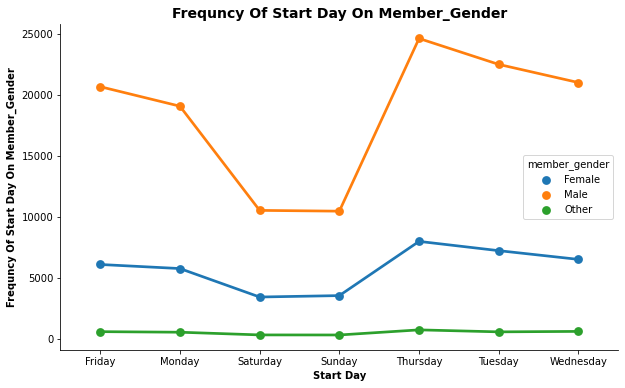

In [108]:
#  call the function for the member_gender plot
thePointplot(member_start_day, 'start_day', 0, 'member_gender', order = order_day)

- As we saw earlier in the univariate visualizations, the `Male gender` has got more number of bike trip than `Female` and `Other`. Wit the `Other` gender having almost none ride.

Let's plot out to see the relationship bwteen the Start hours and User type using the same basic graph style.

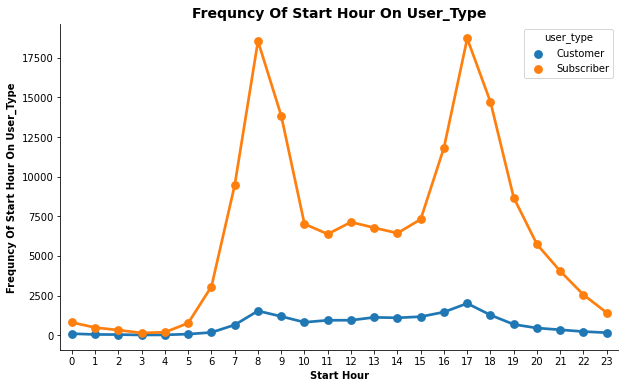

In [109]:
# Call the function for the user type
thePointplot(member_start_hour, 'start_hour', 0, 'user_type', order = order_hour)

As we can see, the `Subscriber` and  `Customer` have amost the same hour time from  Midnight to 5 AM then the `Suscriber` raise up during the day time.

#### The relationship between the gender and Age

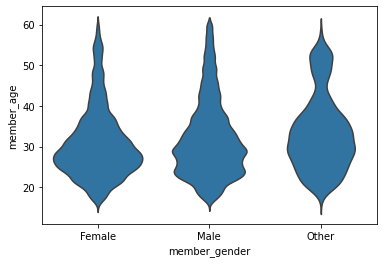

In [110]:
# let's use the voilinplot and box plot will be next just for a simple summarization
sb.violinplot(data = gobike_clean, x = 'member_gender', y = 'member_age', color = base_color, inner = None);

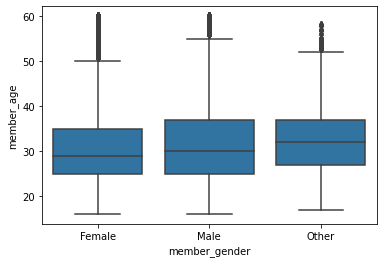

In [111]:
# It is the turn of a box plot
sb.boxplot(data = gobike_clean, x = 'member_gender', y = 'member_age', color = base_color);

- Here, it shows that `Male gender` have the biggest interval age compared to `Female` and `other users`. But this conclusion isn't quite informative because we could see the previous plots that the most often users are `Male`. 
- However, we can retrieve an abious conclusion on the habitual  ages as the mean of all genders roll around almost the same numbers with the Female __29__, Male exactly__ 30__ and Other __31__. 

#### Relationships between Station names and duration

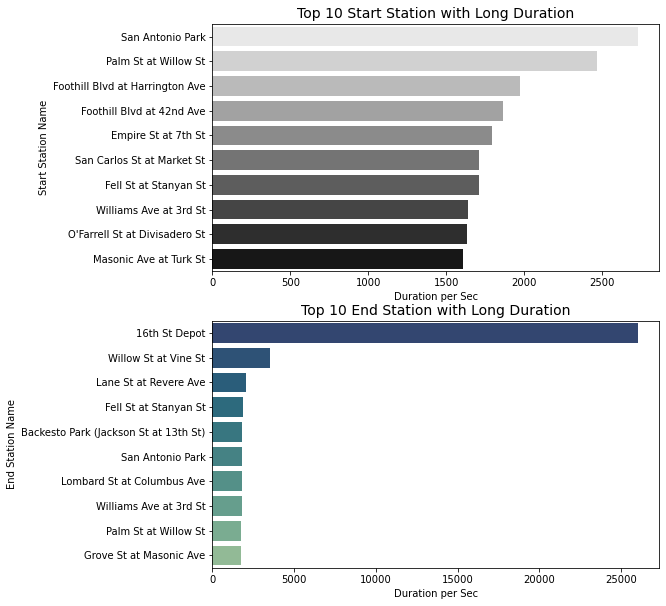

In [112]:
# set the subplot

# find average ride duration for start station and select top 10 start stations
start_station = gobike_clean.groupby('start_station_name')[['duration_sec']].mean().reset_index()
start_station = start_station.sort_values(['duration_sec'], ascending = False).head(10)

# find average ride duration for end station and select top 10 end stations
end_station  = gobike_clean.groupby('end_station_name')[['duration_sec']].mean().reset_index()
end_station = end_station.sort_values(['duration_sec'], ascending = False).head(10)
fig, ax = plt.subplots(nrows = 2, figsize = [8, 10])

# plot  relation
sb.barplot(data = start_station, x = 'duration_sec', y = 'start_station_name', palette = 'gist_yarg', ax = ax[0])
sb.barplot(data = end_station, x = 'duration_sec', y = 'end_station_name', palette = 'crest_r')

# The labels and tiles
for i in ax:
    i.set_xlabel('Duration per Sec')

ax[0].set_title('Top 10 Start Station with Long Duration', fontsize = 14)
ax[1].set_title('Top 10 End Station with Long Duration', fontsize = 14)
ax[0].set_ylabel('Start Station Name')
ax[1].set_ylabel('End Station Name');

- These are the top ten Start Station name with the long duration:
    -  The first longest duration starts on the station (`San Antonio Park`) with over `25000` seconds for the ride
- Then we have the top ten End Station name with the longes duration:
    - The first longest duratio ends on the sation (`16th St Depot`), which took ver `25000` seconds for the ride.

#### Relationship between Ruration and Member Characteristics

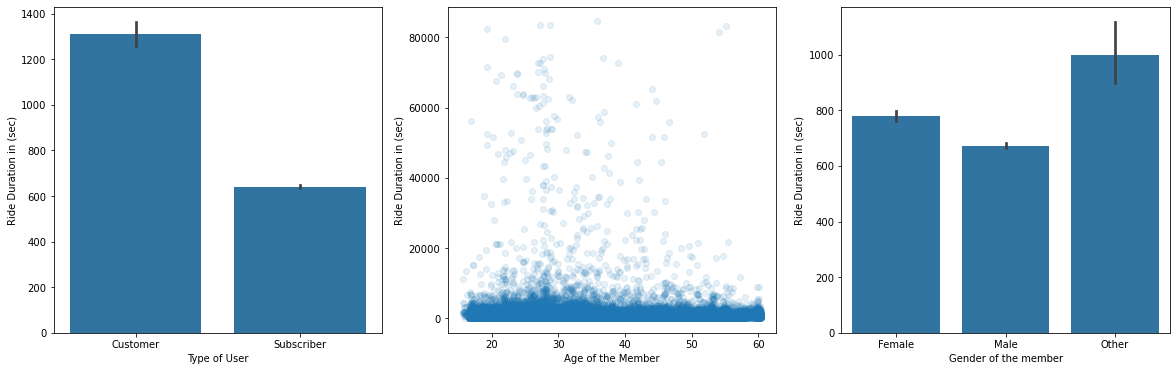

In [113]:
plt.figure(figsize = [20, 6])

# Left graph, user type
plt.subplot(1, 3, 1)
sb.barplot(data = gobike_clean, y = 'duration_sec', x = 'user_type', color = base_color)
plt.xlabel('Type of User')
plt.ylabel('Ride Duration in (sec)')

# Ceter graph, user type
plt.subplot(1, 3, 2)
sb.regplot(data = gobike_clean, y = 'duration_sec', x = 'member_age', fit_reg = False, x_jitter= 0.4, scatter_kws = {'alpha': 1/9})
plt.xlabel('Age of the Member')
plt.ylabel('Ride Duration in (sec)')

# Right graph, user type
plt.subplot(1, 3, 3)
sb.barplot(data = gobike_clean, y = 'duration_sec', x = 'member_gender', color = base_color)
plt.xlabel('Gender of the member')
plt.ylabel('Ride Duration in (sec)');

- Customer users have more ride duration. The conslusion isn't quiete inofrmative since we know from the gate go that the Customer got more trips than the Subcriver user.
- The scatter plot shows the age of a rider doesn't have an impact on the duration of rides.
- The Other has more ride duration per second than Male and Female. And the Female gender has more ride duration than Male.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Customer users have more ride duration and as i said this isn't what could suddenly conclud because first hand, we know that the top number rides belong to the Customer as well.
- Surprisely, the Other gender has got the biggest record based on the duration time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- I thought that the trip duration will have an impact on the age of the riders but it turns out that it doesn't. The Age and duration are fairly correlated to each other.

## Multivariate Exploration

Let's Create plots of three or more variables to investigate

#### First, the ralationship between Duration and Member Characterisitcs

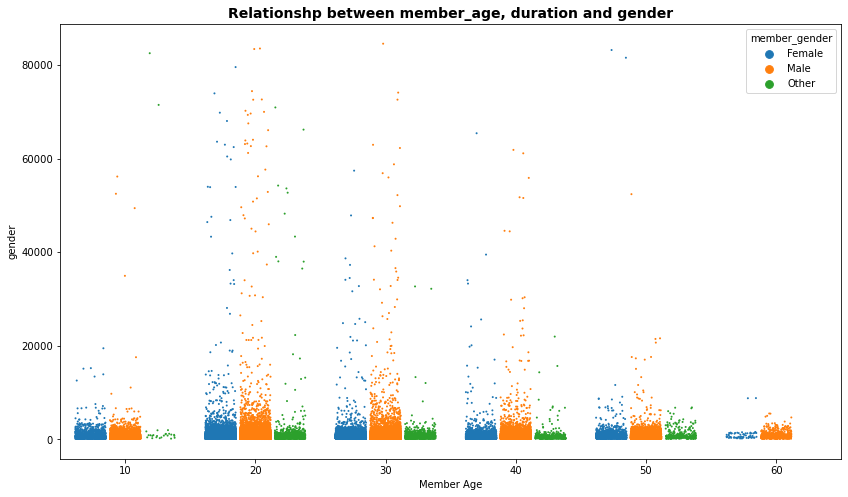

In [122]:
plt.figure(figsize = [14, 8])
# Create an interval in age (say 1o year)
gobike_clean['member_age_intv'] = ((gobike_clean['member_age']//10)*10).astype(int)

sb.stripplot(data = gobike_clean, x = 'member_age_intv', y = 'duration_sec', hue = 'member_gender', size = 2, jitter = 0.35, dodge = True)

plt.title("Relationshp between member_age, duration and gender", fontsize = 14, weight = 'bold')
plt.xlabel('Member Age')
plt.ylabel('gender');

Thanks to this plot, we now understand that in the interval of 20 and 30 years old, most people rides longer than the other interval ages. between 20000 and 60000 seconds, Male and female have a significant long durations of ride.
#### The average duration on days of the week based on type of user

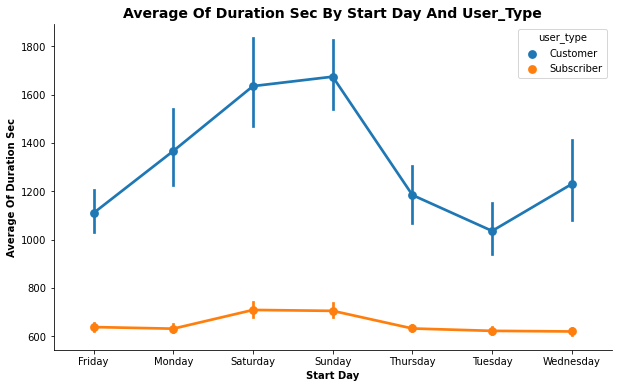

In [118]:
# Call the function to plot this
thePointplot(gobike_clean, 'start_day', 'duration_sec', 'user_type', linestyles = '--', dodge = 0.4, order = order_day)

- In average, Every day of the week, the `Customer` rides longer compared to the `Subsicriber`.

In [145]:
gobike_clean.to_csv('clean_gobike.csv', index = False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration tells us that, ride duration doesn't have any impact on the age but the impact is in the gender categories (Male and Female), which have longer duration with the Female at the top. We also see that, in each day of the wee, the customer rides longer than the Subsiber and the duration of the ride between the two is way big. This multovariabe vaisualization came to make an abious conclusion based on the univariate and bivariate explorations we saw earlier. 

### Were there any interesting or surprising interactions between features?

Surprisingly, from the multivariate exploration, whatever the type of user is, the weekends have more ride duration compared to weekdays. And rgouting age and customer type, the ride duration seems to have no positive or negative effect.

## Conclusions
The rent from the Ford GoBike sharing system had shows interesting facts. Many people from San Francisco prefer riding bike than expected. There are two types of users here, Subscriber and Customer, the Subscriber user type has the most rides but they are all short duration in weedays, this is because many Subscribers rent bikes for the purpose of riding to work and bringing it back from (8 AM and 9 AM) to (5 PM and 6 PM) respectively. The longest rides for both Customers and Subscribers take place in the weekends. This is absolutely acceptebe, because in the weekends people are used to rent bikes for personal enjoyment.
